In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN, OPTICS
import matplotlib.pyplot as plt
import sys
import os
import umap
from sklearn.metrics import silhouette_score

sys.path.append(os.path.abspath('..')) 

from utils.preproc_utils import *
from utils.plot_utils import *
from utils.modeling_utils import *


In [2]:
sys.path.append(os.path.abspath('..')) 
base_dir = os.path.abspath(os.path.join(os.getcwd(), '../../data/processed/'))

latent_rep_path = os.path.join(base_dir, 'latent_representation.csv')
latent_rep = pd.read_csv(latent_rep_path, index_col='customer_id')

In [3]:
scaler = MinMaxScaler()
latent_rep_scaled = pd.DataFrame(scaler.fit_transform(latent_rep), columns=latent_rep.columns, index=latent_rep.index)

In [4]:
latent_rep_scaled.head(3)

,latent_0,latent_1,latent_2,latent_3
customer_id,,,,
39634,0.789207,0.185843,0.595078,0.218777
23937,0.476100,0.105589,0.601062,0.370229
2431,0.710481,0.426843,0.336404,0.176330


In [6]:
db = OPTICS(eps=0.1, min_samples=15)
db_test = latent_rep_scaled.copy()
# Fit the model to your data
db.fit(db_test)

db_test['cluster'] = db.labels_ 

# Identify outliers
db_test_outliers = db_test[db.labels_ == -1]

c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


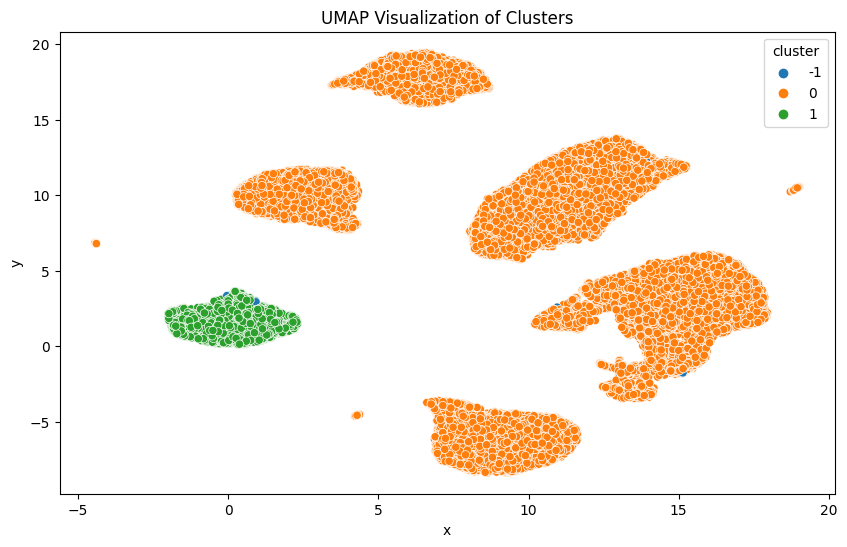

In [8]:
plot_umap_clusters(db_test)

In [21]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination=0.01)
clf_test = latent_rep_scaled.copy()

clf.fit(clf_test)

clf_test_outliers = clf.predict(clf_test)

clf_test['cluster'] = clf_test_outliers

In [22]:
clf_test['cluster'].value_counts()

 1    36532
-1      369
Name: cluster, dtype: int64

c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


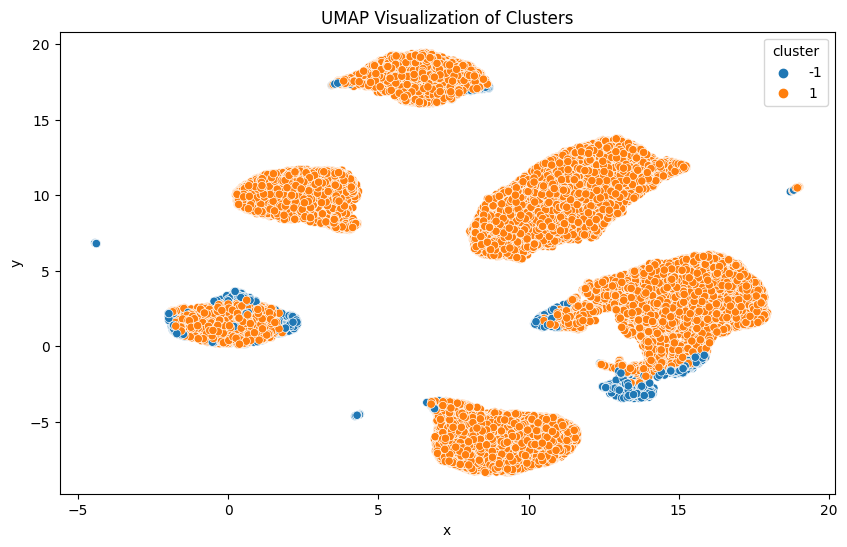

In [12]:
plot_umap_clusters(clf_test)

In [26]:
base_dir = os.path.abspath(os.path.join(os.getcwd(), '../../data/raw/'))

path = os.path.join(base_dir, 'customer_info.csv')
customer_info = pd.read_csv(path, index_col='customer_id')

In [35]:
outliers = customer_info[customer_info['lifetime_spend_fish'] > 5000]
outliers.shape

(407, 25)

In [36]:
customers_to_check = outliers.index

In [43]:
customers_to_check_info = customer_info.loc[customers_to_check]
pd.set_option('display.max_rows', None)
customers_to_check_info['customer_name'].head(410)

customer_id
48086            Charles`s Fishy
31838             Ursula`s Fishy
41519            Lindsay`s Fishy
41076              Carol`s Fishy
43120            Rosetta`s Fishy
3647              Hector`s Fishy
29825               Kara`s Fishy
637               Dianne`s Fishy
22356               Juan`s Fishy
25919             Edison`s Fishy
17763              Sunni`s Fishy
6153             Colleen`s Fishy
5019             Stanley`s Fishy
42855           Fernando`s Fishy
8293                 Hui`s Fishy
44757            Bernard`s Fishy
16529            Blanche`s Fishy
4902          Phd. Gregory Towne
26391            Timothy`s Fishy
5083             Michael`s Fishy
42629              David`s Fishy
26035              Wanda`s Fishy
47595            Darrell`s Fishy
22053               Jose`s Fishy
16094              Linda`s Fishy
46523             Audrey`s Fishy
23080               John`s Fishy
245                Laura`s Fishy
14162           Princess`s Fishy
11748            Natalie`s Fish

In [17]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

def plot_tsne_clusters(df, random_state=42):
    """
    Use t-SNE to plot clusters in the DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame, which must contain a 'cluster' column.
    random_state (int): The random state for reproducibility.

    Returns:
    None
    """
    if 'cluster' not in df.columns:
        raise ValueError("DataFrame must contain a 'cluster' column.")
    
    features = df.drop(columns='cluster')
    labels = df['cluster']
    
    tsne_model = TSNE(n_components=2, random_state=random_state)
    tsne_components = tsne_model.fit_transform(features)
    
    tsne_df = pd.DataFrame(tsne_components, columns=['x', 'y'])
    tsne_df['cluster'] = labels.values
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='x', y='y', hue='cluster', data=tsne_df, palette='tab10')
    plt.title('t-SNE Visualization of Clusters')
    plt.show()

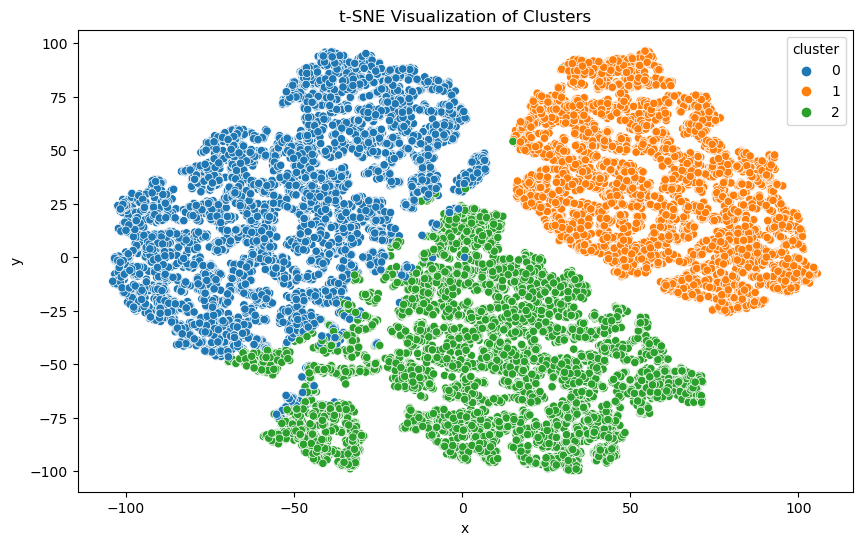

In [18]:
plot_tsne_clusters(latent_rep_scaled_a)